In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
diabetes_df = pd.read_csv("/content/drive/MyDrive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
print("Dataset Shape (Rows, Columns):", diabetes_df.shape)

Dataset Shape (Rows, Columns): (70692, 22)


In [ ]:
diabetes_df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
diabetes_df.Diabetes_binary.unique()

array([0., 1.])

In [ ]:
diabetes_df.nunique()

,0
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [ ]:
diabetes_df.duplicated().sum()

1635

In [ ]:
diabetes_df.drop_duplicates(inplace = True)

In [ ]:
diabetes_df.duplicated().sum()

0

In [ ]:
diabetes_df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
diabetes_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,...,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.605659,...,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.488712,...,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


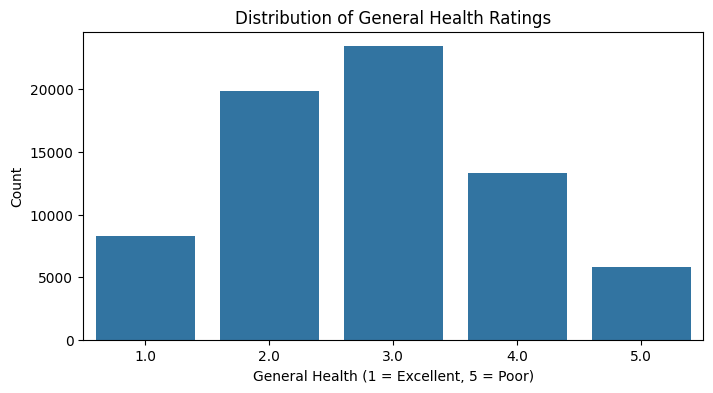

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['GenHlth'])
plt.xticks(rotation=0)
plt.title("Distribution of General Health Ratings")
plt.xlabel("General Health (1 = Excellent, 5 = Poor)")
plt.ylabel("Count")
plt.show()
labels = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']


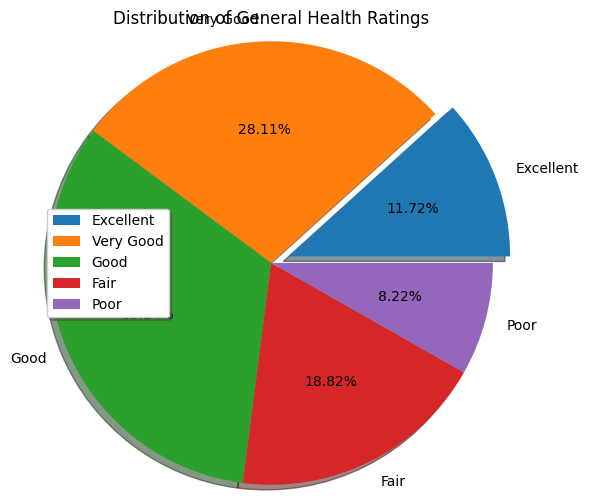

In [ ]:

data1 = df['GenHlth'].value_counts().sort_index().values
explode = [0.1, 0, 0, 0, 0]
plt.figure(figsize=(6,6))
plt.pie(data1, labels=labels, explode=explode, radius=1.2,
        autopct='%0.2f%%', shadow=True, textprops={'fontsize': 10})
plt.legend(loc='center left', shadow=True, fancybox=True)
plt.title("Distribution of General Health Ratings")
plt.show()

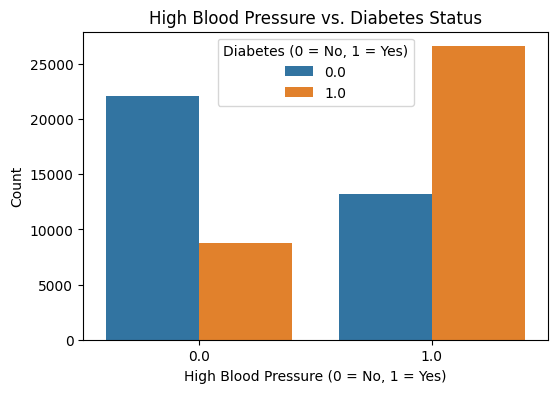

In [ ]:
df.dropna(subset=['HighBP'], inplace=True)
plt.figure(figsize=(6,4))
sns.countplot(x=df['HighBP'], hue=df['Diabetes_binary'])
plt.xticks(rotation=0)
plt.xlabel("High Blood Pressure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("High Blood Pressure vs. Diabetes Status")
plt.legend(title="Diabetes (0 = No, 1 = Yes)")
plt.show()

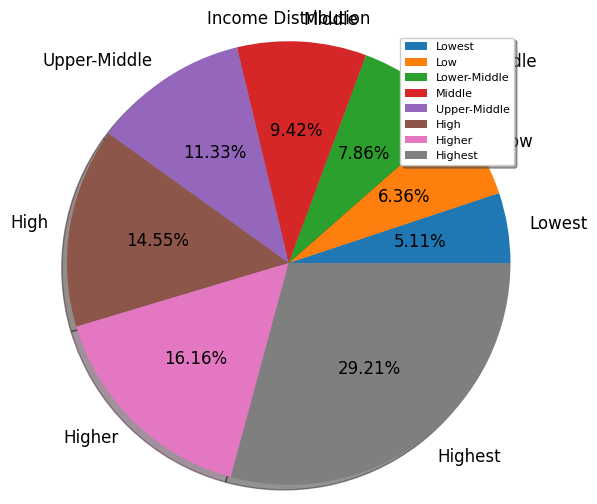

In [ ]:

label_for_income = ['Lowest', 'Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High', 'Higher', 'Highest']

data2 = df['Income'].value_counts().sort_index().values
plt.figure(figsize=(6,6))
plt.pie(data2, labels=label_for_income, radius=1.2, autopct='%0.2f%%',
        shadow=True, textprops={'fontsize': 12})
plt.legend(loc='upper right', shadow=True, fancybox=True, prop={'size': 8})

plt.title("Income Distribution")
plt.show()


GenHlth
3.0    23427
2.0    19872
4.0    13303
1.0     8282
5.0     5808
Name: count, dtype: int64
[ 8282 19872 23427 13303  5808]


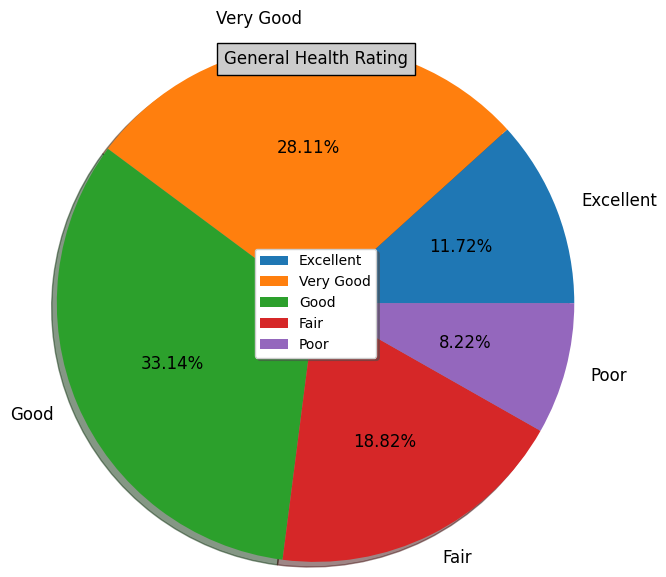

In [ ]:
label_for_GenHlth = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
data3 = df['GenHlth'].value_counts().sort_index().values
print(df['GenHlth'].value_counts())
print(data3)
plt.figure(figsize=(6,6))
plt.title('General Health Rating', bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data3, labels=label_for_GenHlth, radius=1.4, autopct='%0.2f%%',
        shadow=True, textprops={'fontsize': 12})
plt.legend(loc='center', shadow=True, fancybox=True, prop={'size': 10})
plt.show()

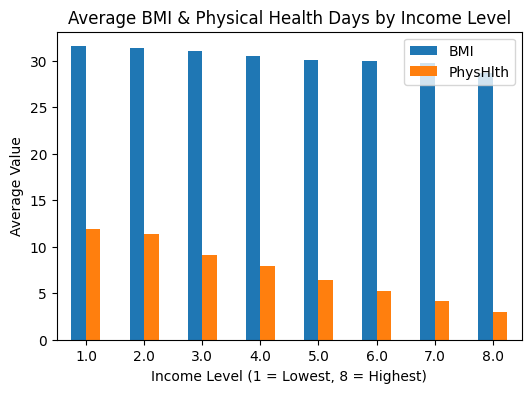

In [ ]:
gp_by_income = df.groupby('Income')[['BMI', 'PhysHlth']].mean().reset_index()

plt.rcParams['figure.figsize'] = (6,4)
gp_by_income.plot(x="Income", y=["BMI", "PhysHlth"], kind="bar")
plt.title("Average BMI & Physical Health Days by Income Level")
plt.xlabel("Income Level (1 = Lowest, 8 = Highest)")
plt.ylabel("Average Value")
plt.legend(["BMI", "PhysHlth"])
plt.xticks(rotation=0)
plt.show()

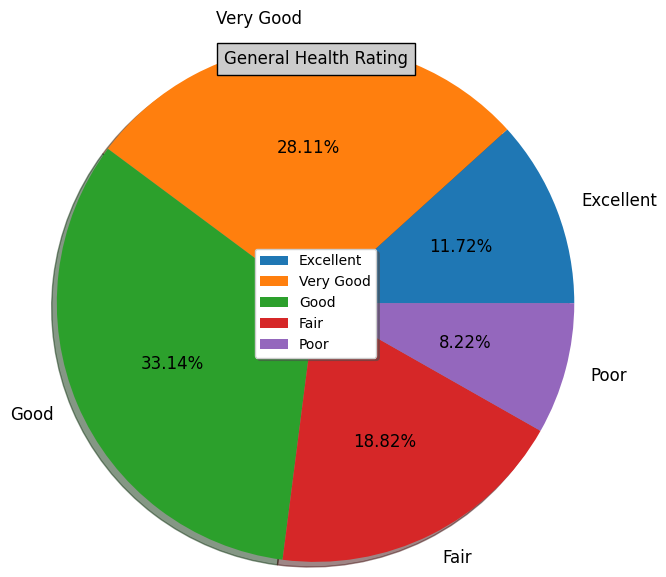

In [ ]:
label_for_GenHlth = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

# Data for the pie chart
data3 = df['GenHlth'].value_counts().sort_index().values
plt.figure(figsize=(6,6))
plt.title('General Health Rating', bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data3, labels=label_for_GenHlth, radius=1.4, autopct='%0.2f%%',
        shadow=True, textprops={'fontsize': 12})
plt.legend(loc='center', shadow=True, fancybox=True, prop={'size': 10})
plt.show()

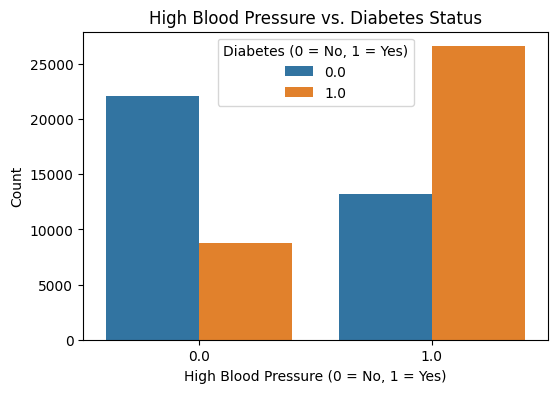

In [ ]:
df.dropna(subset=['HighBP'], inplace=True)

# Countplot of High Blood Pressure by Diabetes Status
plt.figure(figsize=(6,4))
sns.countplot(x=df['HighBP'], hue=df['Diabetes_binary'])
plt.xlabel("High Blood Pressure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("High Blood Pressure vs. Diabetes Status")
plt.legend(title="Diabetes (0 = No, 1 = Yes)")
plt.xticks(rotation=0)
plt.show()

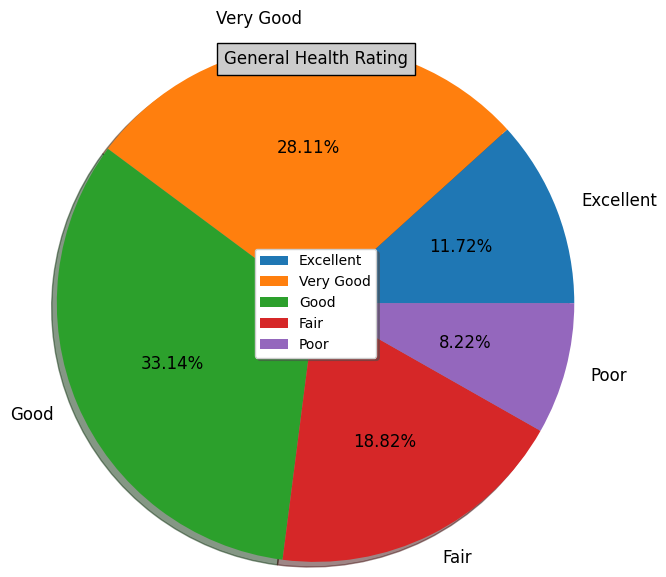

In [ ]:
# Labels for General Health categories
label_for_GenHlth = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']


data4 = df['GenHlth'].value_counts().sort_index().values


plt.figure(figsize=(6,6))
plt.title('General Health Rating', bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data4, labels=label_for_GenHlth, radius=1.4, autopct='%0.2f%%',
        shadow=True, textprops={'fontsize': 12})


plt.legend(loc='center', shadow=True, fancybox=True, prop={'size': 10})
plt.show()


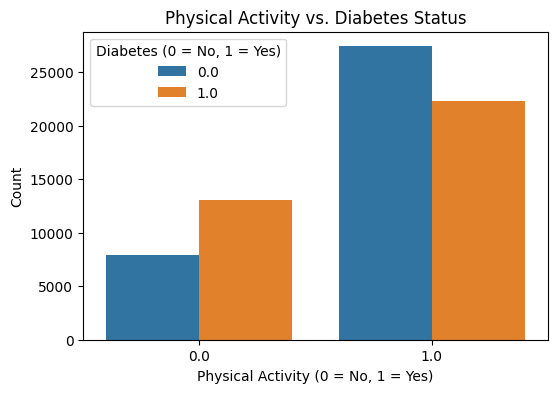

In [ ]:
df.dropna(subset=['PhysActivity'], inplace=True)

# Countplot of Physical Activity by Diabetes Status
plt.figure(figsize=(6,4))
sns.countplot(x=df['PhysActivity'], hue=df['Diabetes_binary'])
plt.xlabel("Physical Activity (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Physical Activity vs. Diabetes Status")
plt.legend(title="Diabetes (0 = No, 1 = Yes)")
plt.xticks(rotation=0)
plt.show()

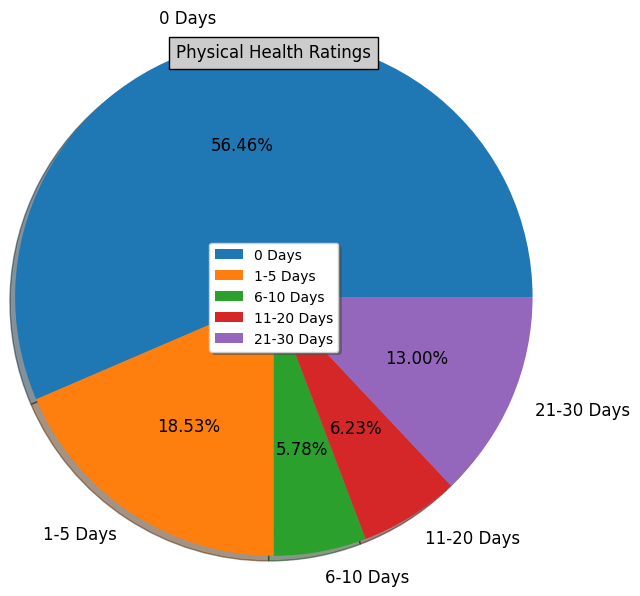

In [ ]:
# Labels for Physical Health categories
label_for_PhysHlth = ['0 Days', '1-5 Days', '6-10 Days', '11-20 Days', '21-30 Days']

df['PhysHlth_Cat'] = pd.cut(df['PhysHlth'], bins=[-1,0,5,10,20,30], labels=label_for_PhysHlth)


data5 = df['PhysHlth_Cat'].value_counts().sort_index().values


plt.figure(figsize=(6,6))
plt.title('Physical Health Ratings', bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data5, labels=label_for_PhysHlth, radius=1.4, autopct='%0.2f%%',
        shadow=True, textprops={'fontsize': 12})


plt.legend(loc='center', shadow=True, fancybox=True, prop={'size': 10})
plt.show()


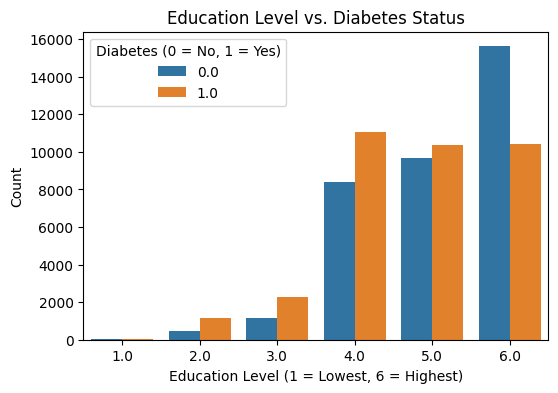

In [ ]:
df.dropna(subset=['Education'], inplace=True)

# Countplot of Education Levels by Diabetes Status
plt.figure(figsize=(6,4))
sns.countplot(x=df['Education'], hue=df['Diabetes_binary'])
plt.xlabel("Education Level (1 = Lowest, 6 = Highest)")
plt.ylabel("Count")
plt.title("Education Level vs. Diabetes Status")
plt.legend(title="Diabetes (0 = No, 1 = Yes)")
plt.xticks(rotation=0)
plt.show()

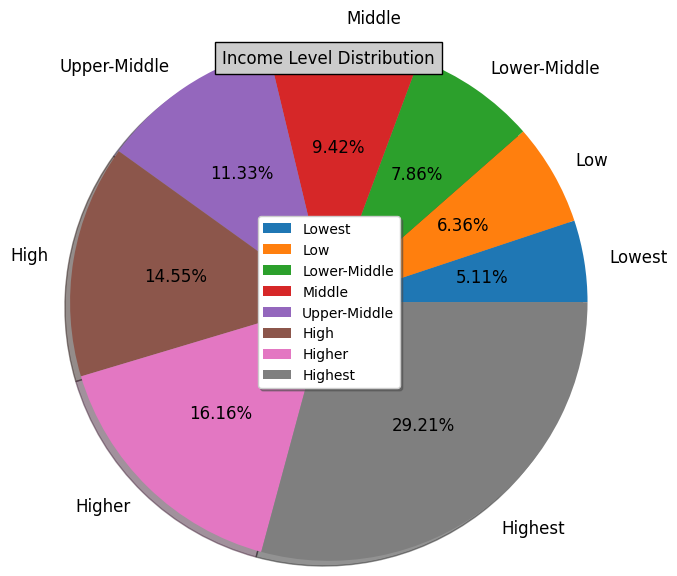

In [ ]:
# Labels for Income categories (assuming 1 = Lowest, 8 = Highest)
label_for_income = ['Lowest', 'Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High', 'Higher', 'Highest']
data6 = df['Income'].value_counts().sort_index().values
plt.figure(figsize=(6,6))
plt.title('Income Level Distribution', bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data6, labels=label_for_income, radius=1.4, autopct='%0.2f%%',
        shadow=True, textprops={'fontsize': 12})
plt.legend(loc='center', shadow=True, fancybox=True, prop={'size': 10})
plt.show()

GenHlth
3.0    23427
2.0    19872
4.0    13303
1.0     8282
5.0     5808
Name: count, dtype: int64


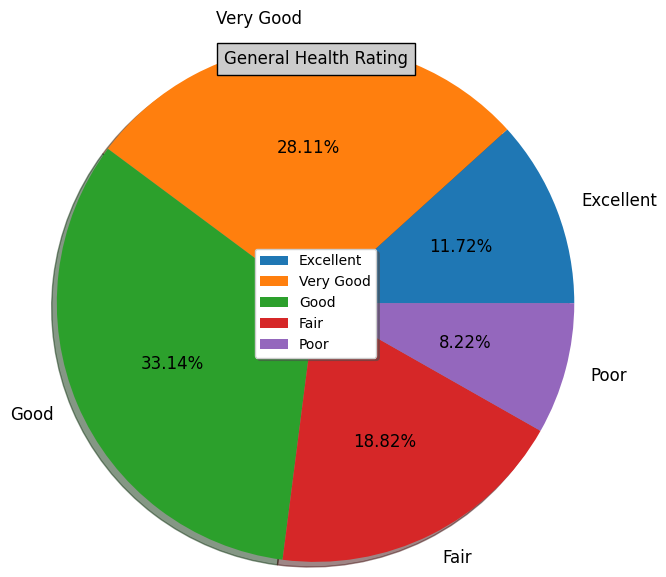

In [ ]:
label_for_GenHlth = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

data7 = df['GenHlth'].value_counts().sort_index().values
print(df['GenHlth'].value_counts())
plt.figure(figsize=(6,6))
plt.title('General Health Rating', bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data7, labels=label_for_GenHlth, radius=1.4, autopct='%0.2f%%',
        shadow=True, textprops={'fontsize': 12})
plt.legend(loc='center', shadow=True, fancybox=True, prop={'size': 10})
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
if "Diabetes_binary" not in df.columns:
    print("Column 'Diabetes_binary' is missing. Please check your dataset.")
else:
    print("Column 'Diabetes_binary' found. Proceeding...")
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if "Diabetes_binary" in numerical_columns:
    numerical_columns.remove("Diabetes_binary")
def remove_outliers_iqr(df, column):
    """Removes outliers from a specified column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for column in numerical_columns:
    df = remove_outliers_iqr(df, column)
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]
print("\n Outliers removed. Cleaned dataset info:")
print(df.info())
print("\n Sample cleaned data:")
print(df.head())
cleaned_filename = "cleaned_diabetes_data.csv"
df.to_csv(cleaned_filename, index=False)
print(f"\n Cleaned dataset saved as '{cleaned_filename}'")

Column 'Diabetes_binary' found. Proceeding...

 Outliers removed. Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 19868 entries, 4 to 70683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       19868 non-null  float64
 1   HighBP                19868 non-null  float64
 2   HighChol              19868 non-null  float64
 3   CholCheck             19868 non-null  float64
 4   BMI                   19868 non-null  float64
 5   Smoker                19868 non-null  float64
 6   Stroke                19868 non-null  float64
 7   HeartDiseaseorAttack  19868 non-null  float64
 8   PhysActivity          19868 non-null  float64
 9   Fruits                19868 non-null  float64
 10  Veggies               19868 non-null  float64
 11  HvyAlcoholConsump     19868 non-null  float64
 12  AnyHealthcare         19868 non-null  float64
 13  NoDocbcCost           19868 non-null  

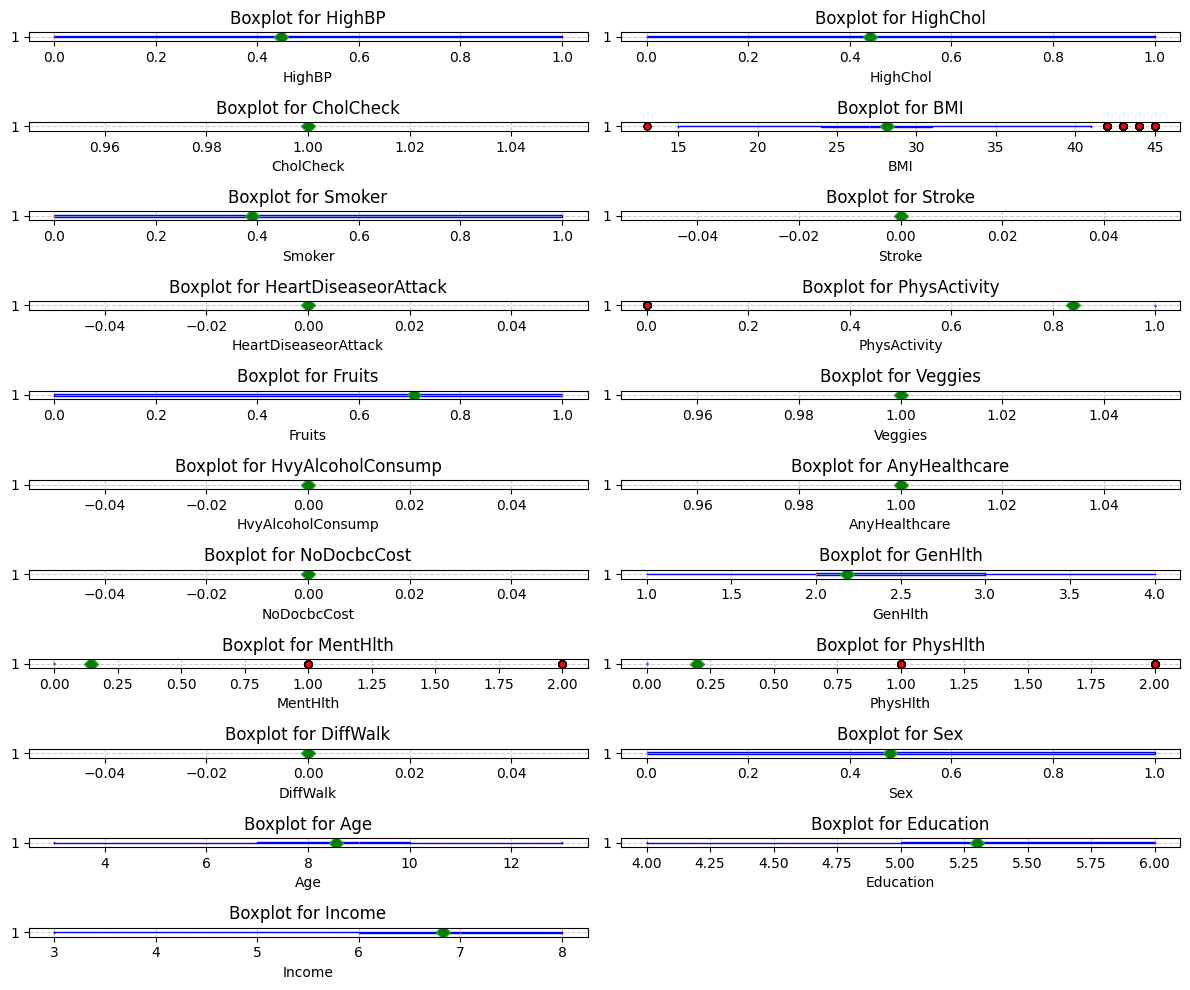

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

if "Diabetes_binary" in numerical_columns:
    numerical_columns.remove("Diabetes_binary")
def remove_outliers_iqr(df, column):
    """Removes outliers from a specified column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for column in numerical_columns:
    df = remove_outliers_iqr(df, column)


def plot_boxplots(df, numerical_columns):
    plt.figure(figsize=(12, 10))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot((len(numerical_columns) + 1) // 2, 2, i)
        plt.boxplot(
            df[column],
            vert=False,
            patch_artist=True,
            showmeans=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            whiskerprops=dict(color="blue"),
            capprops=dict(color="blue"),
            flierprops=dict(markerfacecolor="red", marker="o", markersize=5),
            meanprops=dict(markerfacecolor="green", marker="D", markersize=7)
        )
        plt.title(f'Boxplot for {column}', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
plot_boxplots(df, numerical_columns)


In [ ]:

X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    le = LabelEncoder()
    for col in categorical_columns:
        X.loc[:, col] = le.fit_transform(X[col].astype(str))
print(f"Encoded {len(categorical_columns)} categorical columns: {list(categorical_columns)}")


Encoded 0 categorical columns: []


In [ ]:
X.fillna(0, inplace=True)

In [ ]:
y = df['Diabetes_binary']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:

print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)
print("Shape of Training Features (X_train):", X_train.shape)
print("Shape of Testing Features (X_test):", X_test.shape)
print("Shape of Training Labels (y_train):", y_train.shape)
print("Shape of Testing Labels (y_test):", y_test.shape)


Shape of Features (X): (19868, 21)
Shape of Target (y): (19868,)
Shape of Training Features (X_train): (13907, 21)
Shape of Testing Features (X_test): (5961, 21)
Shape of Training Labels (y_train): (13907,)
Shape of Testing Labels (y_test): (5961,)


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Train an XGBoost model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print("Classification Report:\n", report_xgb)

XGBoost Accuracy: 73.65%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      3778
         1.0       0.65      0.60      0.63      2183

    accuracy                           0.74      5961
   macro avg       0.72      0.71      0.71      5961
weighted avg       0.73      0.74      0.73      5961



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Now you can proceed with model training
log_class = LogisticRegression(max_iter=2000, solver='saga', class_weight='balanced', random_state=42)
log_class.fit(X_train_scaled, y_train)
y_pred = log_class.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Balanced Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Balanced Logistic Regression Accuracy: 73.28%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.72      0.77      3778
         1.0       0.61      0.76      0.67      2183

    accuracy                           0.73      5961
   macro avg       0.72      0.74      0.72      5961
weighted avg       0.75      0.73      0.74      5961



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga'],
    'class_weight': ['balanced', None]
}
log_class = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42), param_grid, cv=5, scoring='accuracy')
log_class.fit(X_train_scaled, y_train)
best_model = log_class.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Improved Accuracy: {accuracy * 100:.2f}%")
print("Best Parameters:", log_class.best_params_)
print("Classification Report:\n", report)

Improved Accuracy: 74.28%
Best Parameters: {'C': 10, 'class_weight': None, 'solver': 'saga'}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.84      0.80      3778
         1.0       0.67      0.58      0.62      2183

    accuracy                           0.74      5961
   macro avg       0.72      0.71      0.71      5961
weighted avg       0.74      0.74      0.74      5961



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'class_weight': ['balanced', None]
}


log_class = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42), param_grid, cv=5, scoring='accuracy')
log_class.fit(X_train_scaled, y_train)

best_model = log_class.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Optimized Accuracy: {accuracy * 100:.2f}%")
print("Best Parameters:", log_class.best_params_)
print("Classification Report:\n", report)


Optimized Accuracy: 74.28%
Best Parameters: {'C': 10, 'class_weight': None, 'solver': 'saga'}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.84      0.80      3778
         1.0       0.67      0.58      0.62      2183

    accuracy                           0.74      5961
   macro avg       0.72      0.71      0.71      5961
weighted avg       0.74      0.74      0.74      5961



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Select important features
selected_features = [
    "GenHlth", "HighBP", "BMI", "HighChol", "Age",
    "DiffWalk", "PhysHlth", "HeartDiseaseorAttack"
]

# Define target and independent variables
X = df[selected_features]
y = df["Diabetes_binary"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.7051


In [ ]:
import pickle

# Save the model to a file
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Model saved as best_logistic_model.pkl")


Model saved as best_logistic_model.pkl


In [ ]:
import pickle

# Save the model to a file
with open('random forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model saved as best_logistic_model.pkl")


Model saved as best_logistic_model.pkl


In [ ]:
from google.colab import drive
drive.mount('/content/drive')